# Variables Aleatorias

Una **variable aleatoria** $X$ es una función que asigna un número $X(\omega)$ a cada elemento $\omega$ en el espacio muestral de un experimento aleatorio.

Se denomina **Variable Aleatoria Discreta** si los valores son enteros:

$\begin{array}{cc} X:& \Omega \to \mathbb{Z} 
\end{array}$

- Nota: El [codominio](https://es.wikipedia.org/wiki/Codominio) of X (todos los valores de salida de la función) también puede ser un conjunto finito que podría ponerse en una correspondencia uno a uno con los enteros en lugar de los enteros $\mathbb{Z}$ direcetamente.

Se denomina **Variable Aleatoria Continua** si los valores son reales:

$\begin{array}{cc} X:& \Omega \to \mathbb{R}
\end{array}$


Ejemplos: 

$\begin{array}{ll} 
X:& \Omega \to \{0,1\}\\
&\omega \to X(\omega)= 
\left\{\begin{array}{ll} 1 & \omega=cara\\
                          0 & \omega=sello \\
\end{array} \right .\\
&\\
 X:& \Omega \to [0,\infty) \\
&\omega \to X(\omega)= t \\
\end{array}$

donde $t$ es el tiempo de falla de una máquina y $\omega$ es el evento de falla con todas sus características no necesariamente observables.

## Función de probabilidad puntual (masa de probabilidad)</span>
En el caso de variables aleatorias discretas, la probabilidades se definen mediante una **función de probabilidad puntual**, o **función de masa de probabilidad**:

$f_X: \mathbb{Z} \to [0, 1]$

Aquí, el subíndice $X$ es para indicar que $f$ es la función masa de probabilidad de $X$. Pero se puede omitir cuando el contexto es claro. Vamos a omitirlo desde ahora para simplificar las notaciones. Así que escribimos:

$f: \mathbb{Z} \to [0, 1]$

$f(x) = P(X = x)$

Recorda que $X$ es una función, no un número. 

Según las propiedades de probabilidad:

$\forall x \in \mathbb{Z}, f(x) \geq 0$

$\sum_{x} f(x) = 1$

**Ejemplo** (distribución de Poisson)

$f(x) = \frac{e^{-10}10^x}{x!} \text{  (x = 0, 1, 2 ...)}$

dónde x representa el número de clientes que llegan al banco el lunes entre 9 y 10 am. Preguntamos:

$P(X=10) = f(10) = ?$

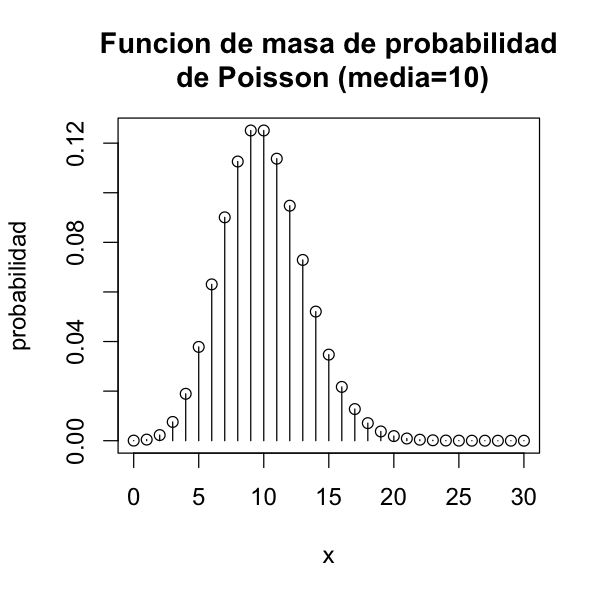

In [14]:
## Caso en que el nro de clientes se modela como Poisson de media 10
options(repr.plot.width=5, repr.plot.height=5)

vec <- seq(0, 30, 1)
pvec <- dpois(vec, 10)

## Si usamos la función incorporada en R
par(cex=1.2) #configura tamaño de fuente
plot(vec, pvec, type="h", main="Funcion de masa de probabilidad\n de Poisson (media=10)", xlab="x", ylab="probabilidad")
points(vec, pvec)

## Si usamos rbokeh:
# library(rbokeh)
# p <- figure(plot_width=600,plot_height=300, title="Ejemplo función de masa de probabilidad de Poisson (media=10)", title_location="above") %>%
#   ly_points(vec,pvec, hover = list(vec,pvec))%>%
#   ly_segments(vec,rep(0,30),vec,pvec)
# p

## Función de densidad de probabilidad

En el caso de variables aleatorias continuas, las probabilidades se definen mediante una **función de densidad de probabilidad** (fdp) o simplemente **función de densidad** de $X$:

$ f: \mathbb{R} \to \mathbb{R}$

La probabilidad de que $X$ tome un valor entre $a$ y $b$ es igual al área sombreada bajo la función de densidad entre las ordenadas en $x = a$ y $x = b$, y a partir del cálculo integral está dada por:

$P(a < X < b) = \int_{a}^{b} f(x) dx$

Según las propiedades de probabilidad:

$\forall x \in \mathbb{R}, f(x) \geq 0$

$\int_{-\infty}^\infty f(x)dx = 1$

:::{note}

En el caso de variables aleatorias continuas:
- $f(x)$ no es una probabilidad! $f(x)$ podría ser mayor que 1. Describe qué tan relativamente posible es que una variable aleatoria continua tome un valor específico en comparación con otros valores (relative likelihood).
- $P(X = x) = 0$. Es decir, la probabilidad de que una variable aleatoria continua tome cualquier valor específico es 0 (absolute likelihood). Para obtener una probabilidad significativa para una variable aleatoria continua, calculamos el área bajo la curva fdp para un rango de x. 
- El área bajo la curva fdp limitada por el eje x sea igual a 1.
:::

**Ejemplo** (distribución normal)

$f(x) = \frac{1}{2\sqrt{2\pi}} exp(\frac{-(x-60)^2}{8})$

dónde x representa el peso (kg) de un individuo. Preguntamos:

$P(58 < X < 62) = \int_{58}^{62} f(x) dx = ? $

[1] 0.6826895

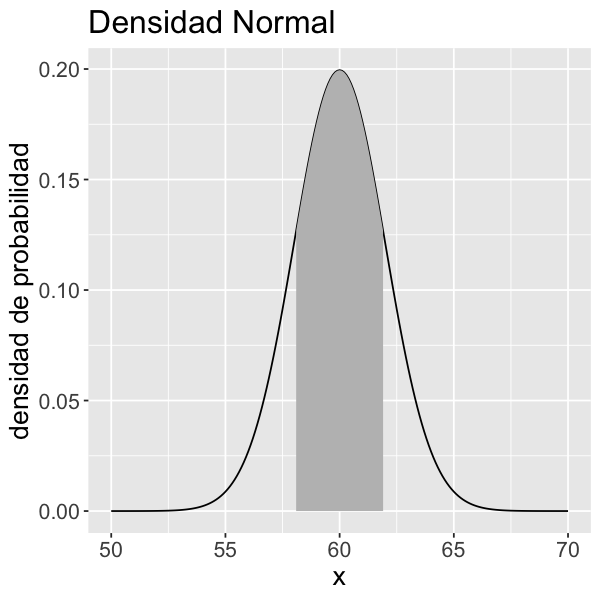

In [36]:
## Caso Normal con media 60 y desviación estándar (sd) 8
options(repr.plot.width=5, repr.plot.height=5)
par(cex=1)

vec <- seq(50, 70, by=0.1)
pvec <- dnorm(vec, 60, 2)

## Si usamos ggplot2
library(ggplot2)
df <- data.frame(vec, pvec)
ggplot(data=df, aes(x=vec, y=pvec)) +
    geom_line() +
    geom_area(data=subset(df, vec>58 & vec<62), fill="grey") +
    ggtitle("Densidad Normal") +
    labs(x="x", y="densidad de probabilidad") +
    theme(text=element_text(size=16))

## Si usamos rbokeh
# vec2 <- seq(58,62,by=0.1)
# library(rbokeh)
# p <- figure(plot_width=600,plot_height=300, title="Ejemplo densidad Normal", title_location="above") %>%
#     ly_lines(vec,pvec) %>%
#     ly_abline( h=0) %>%
#     ly_polygons( x = c(58,vec2,62), y =c(0,dnorm(vec2,60,2),0), col = "grey")
# p

## Calculamos la probabilidad (entre 58 y 62)
pnorm(62,60,2)-pnorm(58,60,2)

## Función de distribución de probabilidad acumulada (distribución acumulativa)
La **función de distribución de probabilidad acumulada** o **función de distribución acumulativa** (o simplemente función de distribución) es la función que devuelve la probabilidad de que una v.a. sea menor o igual que un valor.

En el caso de las v.a. discretas se calcula como:

$ F(x) = P(X \leq x) = \sum_{t \leq x} \limits P(X = t) =\sum_{t \leq x} \limits f(t)$

En el caso de las v.a. continuas se calcula como:

$F(x) = P(X \leq x) = \int_{-\infty}^x f(t)dt $

Como una consecuencia inmediata de la definición arriba, se pueden obtener:

$f(x) = \frac{d}{dx}F(x) $

Y una manera alternativa de obtener la probabilidad:

$P(a \leq X \leq b) = F(b) - F(a)$

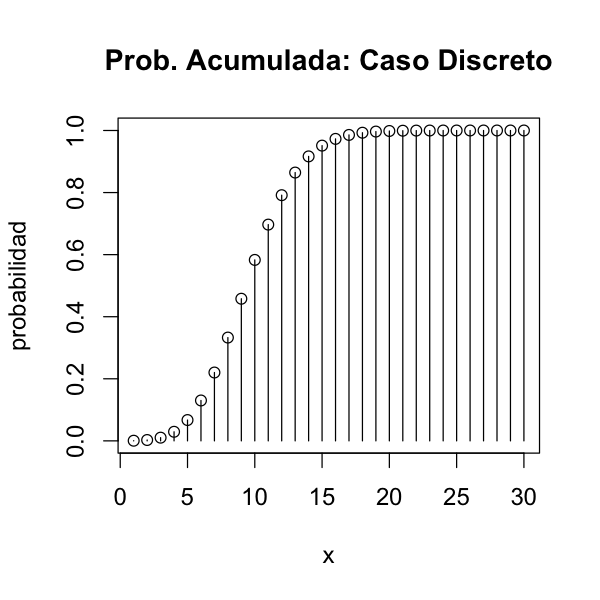

In [16]:
##distribución Poisson acumulada
options(repr.plot.width=5, repr.plot.height=5)

vec <- seq(1, 30, by=1)
pvec <- ppois(vec, 10)

## Si usamos la función incorporada en R
par(cex=1.2) #configura tamaño de fuente
plot(vec, pvec, type="h", main="Prob. Acumulada: Caso Discreto", xlab="x", ylab="probabilidad")
points(vec, pvec)

## Si usamos rbokeh
# library(rbokeh)
# p1 <- figure(plot_width=600,plot_height=200, title="Prob. Acumulada: Caso Discreto", title_location="above") %>%
#   ly_points(vec,pvec, hover = list(vec,pvec))%>%
#   ly_segments(vec,rep(0,30),vec,pvec)
# p1

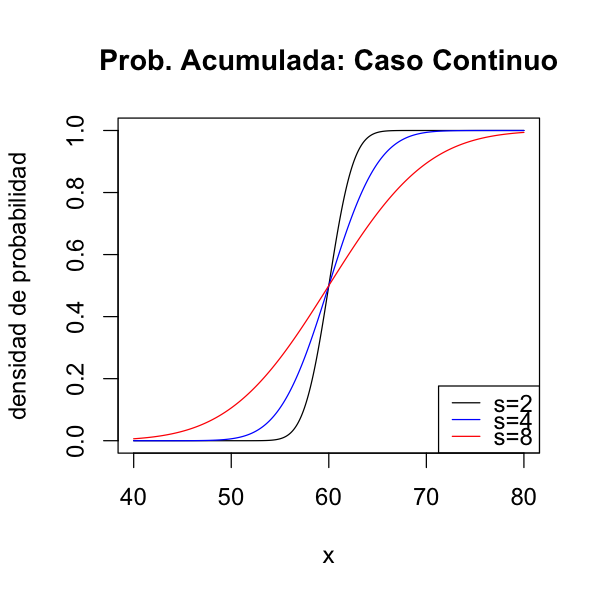

In [34]:
##distribución normal acumulada
options(repr.plot.width=5, repr.plot.height=5)

vec <- seq(40, 80, by=0.1)
pvec1 <- pnorm(vec, 60, 2)
pvec2 <- pnorm(vec, 60, 4)
pvec3 <- pnorm(vec, 60, 8)

## Si usamos la función incorporada en R
par(cex=1.2) #configura tamaño de fuente
plot(vec, pvec1, type="l", col="black", main="Prob. Acumulada: Caso Continuo", xlab="x", ylab="densidad de probabilidad")
lines(vec, pvec2, col="blue")
lines(vec, pvec3, col="red")
legend(x="bottomright", lty=1, legend=c("s=2", "s=4", "s=8"), col=c("black", "blue", "red"), text.width=4)

## Si usamos rbokeh
# p2 <- figure(plot_width=600,plot_height=200, title="Prob. Acumulada: Caso Continuo", title_location="above", legend_location = "bottom_right") %>%
#     ly_lines(vec,pvec1,legend="sd=2") %>%
#     ly_lines(vec,pvec2,col="blue",legend="sd=4") %>%
#     ly_lines(vec,pvec3,col="red",legend="sd=8") 
# p2

## Variables Aleatorias Multidimensionales
Se trata de funciones que asignan un vector multidimensional al resultado de un experimento aleatorio. 
Se denomina **Vector Aleatorio Discreto** si los valores son enteros multidimensionales: 

$\begin{array}{cl} {\bf X}:& \Omega \to \mathbb Z^k\\
&\omega \to {\bf X}(\omega)=(X_1(\omega),\cdots,X_k(\omega)) = (n_1,\cdots,n_k)\\
f: &\mathbb Z^k \to [0, 1]
\end{array}$

y **Vector Aleatorio Continuo** si los valores son reales multidimensionales: 

$\begin{array}{cl} {\bf X}:& \Omega \to \mathbb R^k\\
&\omega \to {\bf X}(\omega)=(X_1(\omega),\cdots,X_k(\omega)) = (x_1,\cdots,x_k)\\
f: &\mathbb R^k \to \mathbb{R}
\end{array}$

**Ejemplo** (caso específico de la distribución exponencial bivariada)

Aquí es un ejemplo de un caso especifico de la distribución exponencial bivariada (cuando los dos variables aleatorias continuas son independentes).

Sea 

$\begin{array}{cl}
(X,Y):&\Omega \to \mathbb R_{+}^2\\
&\omega \to (X(\omega),Y(\omega))=(x,y)\\
\end{array}$

tal que su densidad de probabilidad es:

$f(x,y) = ab e^{-(ax+by)} \qquad a,b>0, \qquad x,y\geq0$

y entonces la distribución acumulativa queda:

$F(x,y)= \int_0^x \int_0^y f(t,s)dsdt
= (1- e^{-ax})(1- e^{-by})$

Notar que 

$\lim_{x,y \to \infty} F(x,y) = 1$

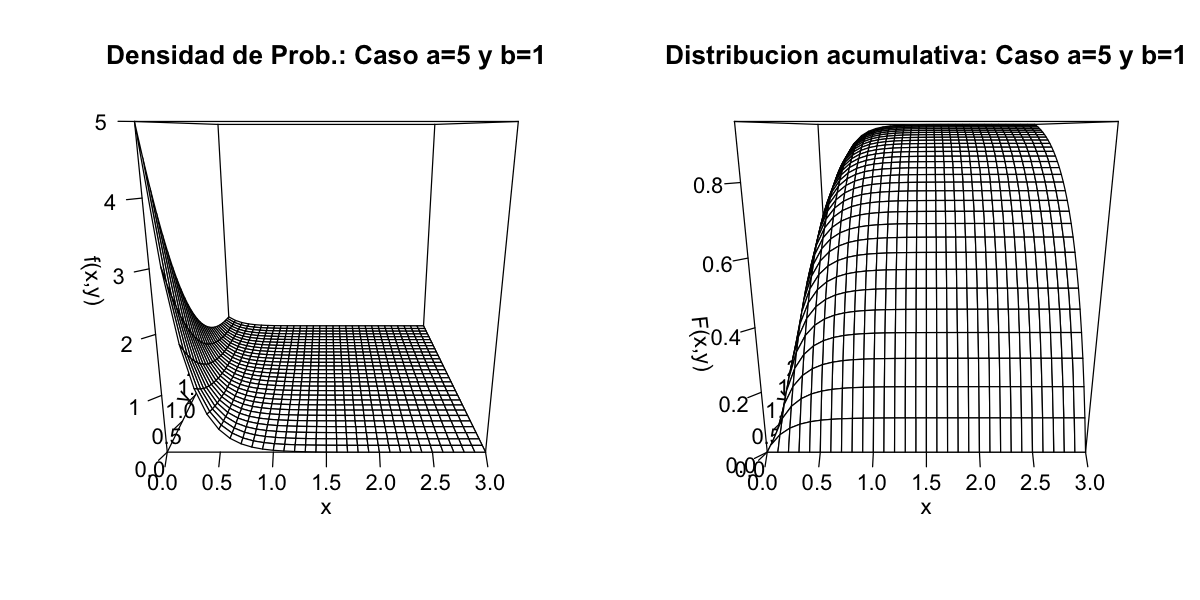

In [18]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1, 2), cex=1.1)

x <- seq(0, 3, by=0.1)
y <- seq(0, 3, by=0.1)
a = 5
b = 1
dens <- function(x,y) a*b*exp(-a*x -b*y)
z = outer(x, y, dens)
persp(x, y, z, ticktype="detailed", zlab="f(x,y)", main="Densidad de Prob.: Caso a=5 y b=1")

acum <- function(x,y) (1 - exp(-a*x)) * (1 - exp(-b*y)) 
z = outer(x, y, acum)
persp(x, y, z, ticktype="detailed", zlab="F(x,y)", main="Distribucion acumulativa: Caso a=5 y b=1")

## Distribución conjunta y independencia estadística
### Distribución conjunta
La función arriba $f(x, y)$ para las ocurrencias simultáneas de las v.a. $X$ y $Y$ es una distribución conjunta.

**Definición (caso discreto)**: La función $f_{X,Y}(x,y)$ es una **distribución de probabilidad conjunta** de las v.a. discretas $X$ y $Y$, si

1. $f_{X,Y}(x, y) \geq 0$ para toda $(x, y)$

2. $\sum_x \sum_y f_{X,Y}(x, y) = 1$

3. $f_{X,Y}(x,y) = P(X=x,Y=y)$

4. $P[ (X, Y) \in A] = \sum_x \sum_y f_{X,Y}( x,y )$, para cualquier región $A$ en el plano $xy$

**Definición (caso continuo)**: La función $f_{X,Y}(x,y)$ es una **función de densidad conjunta** de las v.a. continuas $X$ y $Y$, si

1. $f_{X,Y}(x, y) \geq 0$ para toda $(x, y)$

2. $\int_x \int_y f_{X,Y}(x, y) dx dy = 1$

3. $P[ (X, Y) \in A] = \int\int_A f_{X,Y}( x,y ) dx dy$, para cualquier región $A$ en el plano $xy$

:::{note}
Aquí, el subíndice $X,Y$ en $f_{X,Y}$ es para indicar que la función es para v.a. $X$ y $Y$. Pero se puede omitir cuando el contexto es claro. Esto es el caso para los subindices abajo también.
:::

### Distribución marginal
**Definición**: Las **distribuciones marginales** sólo de $X$ y sólo de $Y$ son

$f_X(x) = \sum_y f_{X, Y}(x, y)$, $f_Y(y) = \sum_x f_{X, Y}(x, y) \quad$ para el caso discreto, y

$f_X(x) = \int_y f_{X, Y}(x, y) dx dy$, $f_Y(y) = \int_x f_{X, Y}(x, y) dxdy \quad$ para el caso continuo.

### Distribución condicional
**Definición**: Sean $X$ y $Y$ dos v.a., discretas o continuas. La **distribución condicional** de la v.a. $Y$, dado que $X = x$, es

$f_{Y|X}(y|x) = \frac{f_{X, Y}(x, y)}{f_X(x)} \quad$ siempre que $f_X(x) > 0$.

De manera similar, la distribución condicional de la v.a. $X$, dado que $Y = y$, es

$f_{X|Y}(x|y) = \frac{f_{X, Y}(x, y)}{f_Y(y)} \quad$ siempre que $f_Y(y) > 0$.

### Independencia estadística

**Definición**: Sean $X$ y $Y$ dos v.a., discretas o continuas, con distribución de probabilidad conjunta $f_{X, Y}(x, y)$ y distribuciones marginales $f_X(x)$ y $f_Y(y)$, respectivamente. Se dice que las v.a. $X$ y $Y$ son **estadísticamente independientes** si y sólo si

$f_{X, Y}(x, y) = f_X(x) f_Y(y)$

para toda $(x,y)$ dentro de sus rangos.

## Regla de Bayes
En su formulación con variables aleatorias, la regla de Bayes queda:

$\begin{array}{lll}
P(y \mid x)& = & \frac{P(x \mid y) P(y)}{P(x)} \,= \, \frac{P(x \mid y) P(y)}{\sum_y P(x\mid y) P(y)}\\
\end{array}$

Aquí, $P(y \mid x)$ es una forma simplifica para escribir $P(Y = y \mid X = x)$. $P(x)$ es una forma simplifica para escribir $P(X = x)$.